In [4]:
import numpy as np

In [5]:
### 데이터 생성하기

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
## 훈련데이터 / 테스트데이터 세트 생성하기
train_input, test_input, train_target, test_target = train_test_split(
                    perch_length, perch_weight, random_state=42)

In [8]:
# 1차원 데이터를 특정 행령의 2차원으로 재생성할 때 사용하는 함수
# 보통 1차원을 2차원으로 만들때는 각행의 값이 차원이 됩니다.
# 즉, 각 행의 값이 배열(리스트) 1개라고 보시면 됩니다.
# 1차원을 2차원으로 만들때는 첫번째 행은 전체 갯수, 두번째는 1이 됩니다.
# 전체 갯수를 모를 때는 -1 값을 사용하면 전체 행의 갯수를 체크합니다.
train_input = train_input.reshape(-1, 1)
test_input  = test_input.reshape(-1, 1)

In [9]:
print(train_input.shape, test_input.shape)
print(train_input)
print("---------------")
print(test_input)


(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
---------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [10]:
from sklearn.neighbors import KNeighborsRegressor

### 클래스(모델) 이름 : KNeighborsRegressor()
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [11]:
### 훈련데이터 학습시키기 : 훈련모델 생성하기
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [12]:
### 예측데이터 : 50
knr.predict([[100]])

array([1033.33333333])

In [13]:
### - 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
import matplotlib.pyplot as plt

In [14]:
### 이웃 데이터 추출하기
distances, indexes = knr.kneighbors([[50]])
indexes

array([[34,  8, 14]], dtype=int64)

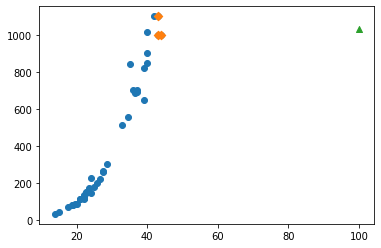

In [15]:
### 산점도 시각화하기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(100, 1033, marker="^")
plt.show()

## 선형회귀(Linear Regression)
##### - 많이 사용되는 대표적인 회귀 알고리즘
##### - 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행시 초반에 주로 진행합니다.
##### - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
##### - 직선을 "추세선" 이라고 합니다.
##### - 선형회귀 알고리즘 : 1차 방정식 (y = ax + b)
##### - 선형회귀 클래스(모델) : LinearRegresin
##### - 사용되는 패키지 : sklearn.linear_model

In [17]:
### 선형회귀 클래스(모델) 생성하기
from  sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
### 사용 데이터 : train_input, train_target, test_input, test_target
### 예측데이터 : 길이 50cm

# lr 모델 훈련 > 예측데이터로 예측하기..

In [18]:
### 훈련모델 생성하기
lr.fit(train_input, train_target)

LinearRegression()

In [19]:
### 예측데이터로 예측하기
lr.predict([[50]])

array([1241.83860323])

In [20]:
### 일차방정식의 기울기와 y절편값 확인하기
# 일차 방정식 : y = ax + b
# a : 기울기(coef_)
# b : y절편(intercept_)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


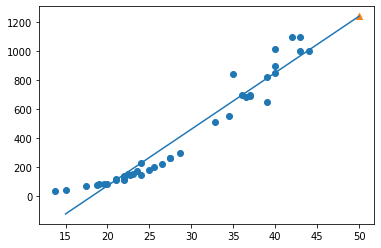

In [24]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# - 예측데이터로 사용할 수 있을지 확인
# - 산점도를 이용해서 확인하기
# - 훈련데이터, 예측데이터 산점도로 그리기.

plt.scatter(train_input, train_target)
plt.scatter(50, 1241.8386, marker="^")

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([15, 50], [lr.coef_ * 15 + lr.intercept_, 
                    lr.coef_ * 50 + lr.intercept_])

plt.show()

In [25]:
### 훈련데이터와 테스트데이터의 과적합여부 확인하기.
# - KNN은 과소적합이 나왔었습니다.
# - LR 모델은 개선이 되었는지 확인..
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

##(해석)
# - 테스트 결과가 다소 낮게 나왔으며, 훈련데이터는 높은편,
# - 다소 차이는 있으나 우수한 모델로 평가는 할 수 있음
# - 단, 훈련데이터와 테스트데이터의 결정계수의 차이는
#       의심을 해봐야 합니다.

### 그래프 왼쪽 하단의 산점도 분포가 조금 특이합니다.
# - 약간의 round(곡선)을 뛰고 있습니다.
# - 추세선의 왼쪽 하단으로 직선을 연장 했을 때,
#   y축 0 이하로 넘어갑니다. 무게는 0보다 작을 수 없습니다.
#   음수를 예측하면 잘 못된 모델 입니다.

0.9398463339976041
0.824750312331356


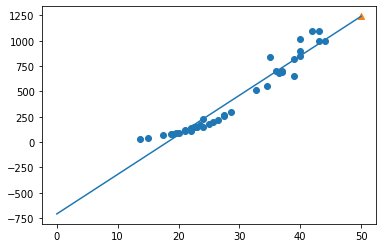

In [26]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# - 예측데이터로 사용할 수 있을지 확인
# - 산점도를 이용해서 확인하기
# - 훈련데이터, 예측데이터 산점도로 그리기.

plt.scatter(train_input, train_target)
plt.scatter(50, 1241.8386, marker="^")

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미함
plt.plot([0, 50], [lr.coef_ * 0 + lr.intercept_, 
                    lr.coef_ * 50 + lr.intercept_])

plt.show()

## 다항회귀분석
##### - 다항식을 사용한 선형회귀를 "다항회귀"라고도 합니다.
##### - 다항식(이차방정식) : y = ax2 + bx + c
##### - a와 b : 계수라고 칭합니다.(기울기 포함)
##### - c : y절편

In [28]:
### 훈련데이터 train_input을 [[제곱된값 1개, 원래값 1개], [], []]
### 변수 : train_poly
train_poly = np.column_stack((train_input**2, train_input))
train_poly.shape

(42, 2)

In [29]:
test_poly = np.column_stack((test_input**2, test_input))
test_poly.shape

(14, 2)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278264


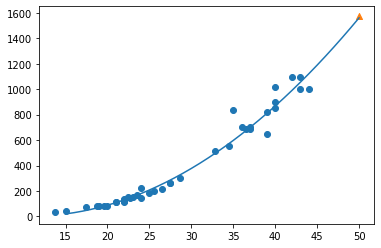

In [40]:
# - 객체(모델) 생성..
lr = LinearRegression()

# - 훈련모델 생성
lr.fit(train_poly, train_target)

# - 예측데이터 : 길이 50으로 무게 예측
print(lr.predict([[50**2, 50]]))

# - 계수 확인 (coef_, intercept_)
print(lr.coef_, lr.intercept_)

# - 산점도 그리기 : 훈련데이터, 예측데이터, 추세선
plt.scatter(train_input, train_target)
plt.scatter([50], [1573.984], marker="^")

# 추세선 그리기
point = np.arange(15, 51)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.show()

In [35]:
np.arange(15, 51)

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

In [41]:
### 과적합 확인하기..(과대/과소)
print("훈련 = ", lr.score(train_poly, train_target))
print("테스트 = ", lr.score(test_poly, test_target))

훈련 =  0.9706807451768623
테스트 =  0.9775935108325122


In [ ]:
### (해석)
# 전체적으로 정확도는 낮아졌습니다.
# 그렇지만, 훈련/테스트의 결정계수는 유사하게 가까워졌기에,
# 우수한 모델이라고 할 수 있습니다.

# 다만, 아직 훈련이 테스트보다 낮은 과소적합을 보입니다.

### 그럼 어떻게?
# - 복잡도를 줄 수 있는 모델을 찾아야 합니다.